In [71]:
#Importing the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [137]:
data = pd.read_csv('dataset.csv')
data.head()

,id,date,user,text
0,1250952843156008960,2020-04-17 01:02:54,lissetteayalaa_,Today when my sons father face timed my son an...
1,1250950521344622593,2020-04-17 00:53:40,MERLOWS_WORLD,I don’t think y’all understand the anger in my...
2,1250950273532489729,2020-04-17 00:52:41,DeviousWinston,"@GreaserGirl18 ""Mm, nah.""\n\nHe wasn't gonna l..."
3,1250948107346591745,2020-04-17 00:44:04,baekthicthighs,"“I want you to leave my son alone.” He said, a..."
4,1250948003243925505,2020-04-17 00:43:40,Scootermam1,@JeromeFinance @steamfitter115 @Tack_in_FL @Eu...


Dropping unwanted columns from the dataset

In [138]:
data.drop('date', inplace=True, axis=1)
data.drop('user', inplace=True, axis=1)

In [139]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1687 non-null   int64 
 1   text    1687 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.5+ KB


Preprocessing the dataset

In [140]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [141]:
data.head()

,id,text
0,1250952843156008960,Today when my sons father face timed my son an...
1,1250950521344622593,I don’t think y’all understand the anger in my...
2,1250950273532489729,"@GreaserGirl18 ""Mm, nah.""\n\nHe wasn't gonna l..."
3,1250948107346591745,"“I want you to leave my son alone.” He said, a..."
4,1250948003243925505,@JeromeFinance @steamfitter115 @Tack_in_FL @Eu...


In [142]:
#Removing Twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [143]:
data.head()

,id,text,clean_tweet
0,1250952843156008960,Today when my sons father face timed my son an...,Today when my sons father face timed my son an...
1,1250950521344622593,I don’t think y’all understand the anger in my...,I don’t think y’all understand the anger in my...
2,1250950273532489729,"@GreaserGirl18 ""Mm, nah.""\n\nHe wasn't gonna l...","""Mm, nah.""\n\nHe wasn't gonna listen till he ..."
3,1250948107346591745,"“I want you to leave my son alone.” He said, a...","“I want you to leave my son alone.” He said, a..."
4,1250948003243925505,@JeromeFinance @steamfitter115 @Tack_in_FL @Eu...,Seems all you got is vague generalities a...


In [144]:
# remove special characters, numbers and punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,id,text,clean_tweet
0,1250952843156008960,Today when my sons father face timed my son an...,Today when my sons father face timed my son an...
1,1250950521344622593,I don’t think y’all understand the anger in my...,I don t think y all understand the anger in my...
2,1250950273532489729,"@GreaserGirl18 ""Mm, nah.""\n\nHe wasn't gonna l...",Mm nah He wasn t gonna listen till he sa...
3,1250948107346591745,"“I want you to leave my son alone.” He said, a...",I want you to leave my son alone He said a...
4,1250948003243925505,@JeromeFinance @steamfitter115 @Tack_in_FL @Eu...,Seems all you got is vague generalities a...


In [145]:
# individual words considered as tokens
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Today, when, my, sons, father, face, timed, m...
1    [I, don, t, think, y, all, understand, the, an...
2    [Mm, nah, He, wasn, t, gonna, listen, till, he...
3    [I, want, you, to, leave, my, son, alone, He, ...
4    [Seems, all, you, got, is, vague, generalities...
Name: clean_tweet, dtype: object

In [146]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [today, when, my, son, father, face, time, my,...
1    [i, don, t, think, y, all, understand, the, an...
2    [mm, nah, he, wasn, t, gonna, listen, till, he...
3    [i, want, you, to, leav, my, son, alon, he, sa...
4    [seem, all, you, got, is, vagu, gener, and, in...
Name: clean_tweet, dtype: object

In [147]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
data['Subjectivity']=data['text'].apply(getSubjectivity)
data['Polarity']=data['text'].apply(getPolarity)
data

,id,text,clean_tweet,Subjectivity,Polarity
0,1250952843156008960,Today when my sons father face timed my son an...,Today when my sons father face timed my son an...,0.511111,0.016667
1,1250950521344622593,I don’t think y’all understand the anger in my...,I don t think y all understand the anger in my...,0.550000,-0.750000
2,1250950273532489729,"@GreaserGirl18 ""Mm, nah.""\n\nHe wasn't gonna l...",Mm nah He wasn t gonna listen till he sa...,0.354321,-0.115895
3,1250948107346591745,"“I want you to leave my son alone.” He said, a...",I want you to leave my son alone He said a...,0.391667,-0.408333
4,1250948003243925505,@JeromeFinance @steamfitter115 @Tack_in_FL @Eu...,Seems all you got is vague generalities a...,0.366667,-0.500000
...,...,...,...,...,...
1682,1248139712302174208,@monicashekhawa5 @authorshivanii has written t...,has written this poem for you She was in...,0.553333,0.040000
1683,1248137844905959424,"@ClonedDevil Though her face twitches, she ref...",Though her face twitches she refuses to brea...,0.733333,-0.369792
1684,1248133111155691521,North Face leads to anger; anger leads to hate...,North Face leads to anger anger leads to hate...,0.550000,-0.750000
1685,1248119966563307522,"@SadisticPiett Mauve glared at him, anger stea...",Mauve glared at him anger steaming off her f...,0.260000,-0.367500


In [148]:
#Create a fun to compute neg,pos,neutral analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
data['Analysis']=data['Polarity'].apply(getAnalysis)
data

,id,text,clean_tweet,Subjectivity,Polarity,Analysis
0,1250952843156008960,Today when my sons father face timed my son an...,Today when my sons father face timed my son an...,0.511111,0.016667,Positive
1,1250950521344622593,I don’t think y’all understand the anger in my...,I don t think y all understand the anger in my...,0.550000,-0.750000,Negative
2,1250950273532489729,"@GreaserGirl18 ""Mm, nah.""\n\nHe wasn't gonna l...",Mm nah He wasn t gonna listen till he sa...,0.354321,-0.115895,Negative
3,1250948107346591745,"“I want you to leave my son alone.” He said, a...",I want you to leave my son alone He said a...,0.391667,-0.408333,Negative
4,1250948003243925505,@JeromeFinance @steamfitter115 @Tack_in_FL @Eu...,Seems all you got is vague generalities a...,0.366667,-0.500000,Negative
...,...,...,...,...,...,...
1682,1248139712302174208,@monicashekhawa5 @authorshivanii has written t...,has written this poem for you She was in...,0.553333,0.040000,Positive
1683,1248137844905959424,"@ClonedDevil Though her face twitches, she ref...",Though her face twitches she refuses to brea...,0.733333,-0.369792,Negative
1684,1248133111155691521,North Face leads to anger; anger leads to hate...,North Face leads to anger anger leads to hate...,0.550000,-0.750000,Negative
1685,1248119966563307522,"@SadisticPiett Mauve glared at him, anger stea...",Mauve glared at him anger steaming off her f...,0.260000,-0.367500,Negative


In [149]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
data['clean_tweet'] = tokenized_tweet
data.head()

,id,text,clean_tweet,Subjectivity,Polarity,Analysis
0,1250952843156008960,Today when my sons father face timed my son an...,today when my son father face time my son and ...,0.511111,0.016667,Positive
1,1250950521344622593,I don’t think y’all understand the anger in my...,i don t think y all understand the anger in my...,0.550000,-0.750000,Negative
2,1250950273532489729,"@GreaserGirl18 ""Mm, nah.""\n\nHe wasn't gonna l...",mm nah he wasn t gonna listen till he saw her ...,0.354321,-0.115895,Negative
3,1250948107346591745,"“I want you to leave my son alone.” He said, a...",i want you to leav my son alon he said anger n...,0.391667,-0.408333,Negative
4,1250948003243925505,@JeromeFinance @steamfitter115 @Tack_in_FL @Eu...,seem all you got is vagu gener and insult leas...,0.366667,-0.500000,Negative


Exploratory Data Analysis(EDA)

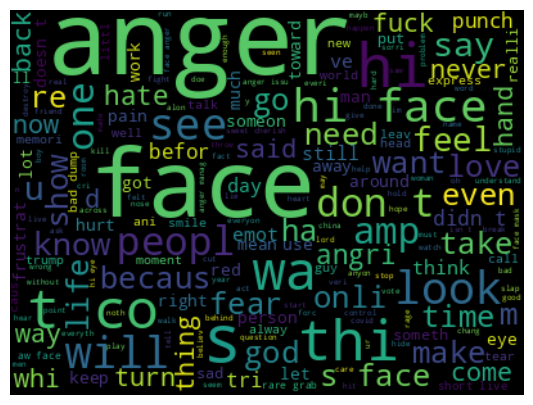

In [150]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in data['clean_tweet'][data['Analysis']=='Negative']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=400, height=300, random_state=42, max_font_size=80).generate(all_words)

# plot the graph
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

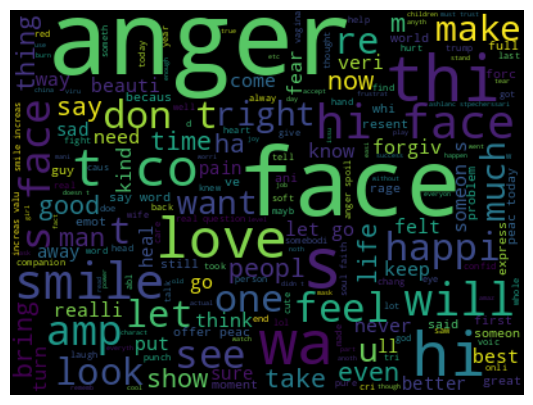

In [151]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in data['clean_tweet'][data['Analysis']=='Positive']])

wordcloud = WordCloud(width=400, height=300, random_state=42, max_font_size=80).generate(all_words)

# plot the graph
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [173]:
#Print all the positive tweets
j=1
sortedDF=data.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+ ')'+sortedDF['text'][i])
    print()
    j=j+1

1)Today when my sons father face timed my son and I saw him for the first time I didn’t feel anger. It’s so refreshing,

2)Did I offer peace today? Did I bring smile to someone's face? Did I say words of healing? Did I let go off my anger? Did I forgive? Did I love? These are the real questions 😇 good morning people 💙 https://t.co/wJkYOEFItY

3)/ see what I love about this is that it expresses their anger towards one another AND their softness? like, there's a soft smirk on his face and she's just ,,, unable to accept it. but they're also arguing? and it perfectly sums up the on and off relationship they've had https://t.co/q7WdUy7XUS

4)@redeemedrachel So, true. Sometime I reflect, when we face Jesus, how many things that made the world a better place did I do with patience &amp; kindness would I be able to return, or would it be just mostly good time and pleasure or worse- unforgiveness and anger:-)

@realDonaldTrump @elonmusk

5)@cheryl_kernot @MorpheusBeing @GladysB Numbers go like

In [153]:
#Print all the negative tweets
j=1
sortedDF=data.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+ ')'+sortedDF['text'][i])
    print()
    j=j+1

1)I don’t think y’all understand the anger in my face &amp; hate in my eyes when she came, grabbed my fork &amp; started eating some of my fried rice🤬🤬

2)@GreaserGirl18 "Mm, nah."

He wasn't gonna listen till he saw her face tomato red with anger. After she began to cuss him out he couldn't help but laugh and finally put her down.

Nose scrunched, red face, and beady little eyes filled with anger.

"What? What's ta matter huh? Cant beat me?"

3)“I want you to leave my son alone.” He said, anger now replacing his face. “I’ve heard about you. And worse, I’ve seen you. Roaming around in bars, mingling with other alphas. You’re a slut, aren’t you?” Chanyeol accused him. 

“N-no. I’m not.” Baekhyun squeaked.

4)@JeromeFinance @steamfitter115 @Tack_in_FL @EugJHawk @realDonaldTrump Seems all you got is vague generalities and insults.  Least I came with a bit of reason.  Came on your face it seems with all that anger

5)Bro when I watched this you could see the anger on his face and hear it i

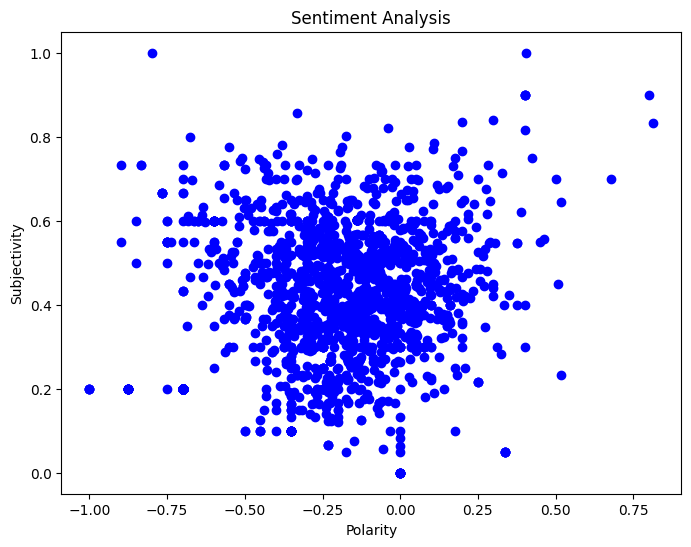

In [154]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
  plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

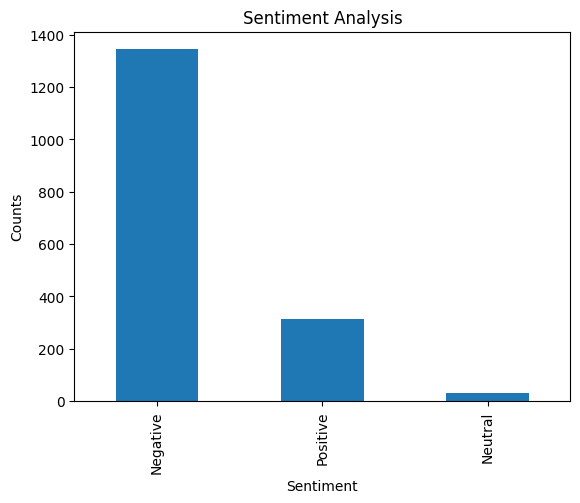

In [155]:
#Show the value counts
data['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Dataset labels distribuition')

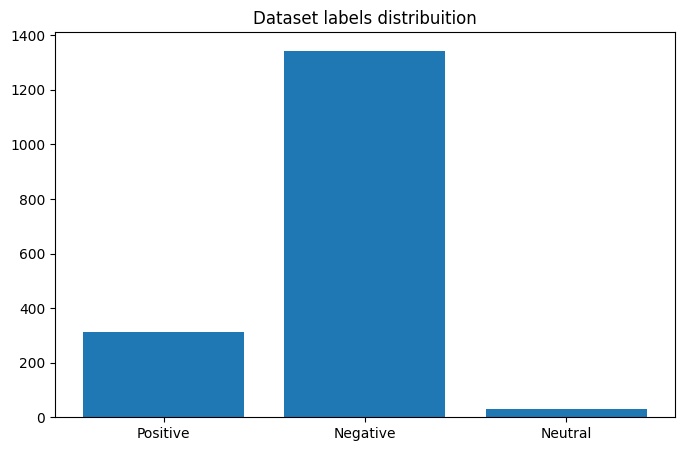

In [156]:
from collections import Counter
target_cnt = Counter(data.Analysis)

plt.figure(figsize=(8,5))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [157]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [158]:
# extract hashtags from +ve tweets
ht_positive = hashtag_extract(data['clean_tweet'][data['Analysis']=='Positive'])

# extract hashtags from -ve tweets
ht_negative = hashtag_extract(data['clean_tweet'][data['Analysis']=='Negative'])

In [159]:
ht_positive[:5]

[[], [], [], [], []]

In [160]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [161]:
print(ht_negative[:5])
print(ht_positive[:5])

['anger', 'grief', 'love', 'therestishistori', 'yeonjun']
['wuhanviru', 'china', 'coronaviru', 'coronadiari', 'lifelesson']


In [162]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,wuhanviru,1
1,china,1
2,coronaviru,1
3,coronadiari,1
4,lifelesson,1


Input Split

In [163]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['clean_tweet'])

In [164]:
#bow[0].toarray()

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, data['Analysis'], random_state=42, test_size=0.25)

Model Training

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [167]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [168]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred, average='macro')

0.5433397549558426

In [169]:
accuracy_score(y_test,pred)

0.8270142180094787